### Simple Regression with PyTorch

Let’s learn simple regression with PyTorch examples:

In [1]:
# Some useful imports

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

Our network model is a simple Linear layer with an input and an output shape of 1.

In [2]:
class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.layer = torch.nn.Linear(1, 1)

   def forward(self, x):
       x = self.layer(x)      
       return x

net = Net()
print(net)

Net(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)


Before you start the training process, you need to know our data. You make a random function to test our model.

Y = x^3 sin(x)+ 3x+0.8 rand(100)

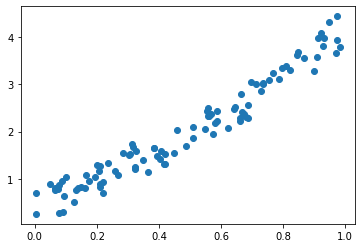

In [3]:
# Visualize our data

x = np.random.rand(100)
y = np.sin(x) * np.power(x,3) + 3*x + np.random.rand(100)*0.8

plt.scatter(x, y)
plt.show()

Before you start the training process, you need to convert the numpy array to Tensor.

In [4]:
# convert numpy array to tensor in shape of input size
x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()
print(x, y)

tensor([[0.2854],
        [0.2577],
        [0.1391],
        [0.0664],
        [0.0050],
        [0.3939],
        [0.8461],
        [0.5743],
        [0.3231],
        [0.4187],
        [0.1327],
        [0.0864],
        [0.0486],
        [0.5592],
        [0.6874],
        [0.3826],
        [0.5612],
        [0.2007],
        [0.9476],
        [0.2111],
        [0.2185],
        [0.0932],
        [0.4047],
        [0.5857],
        [0.7348],
        [0.5084],
        [0.6785],
        [0.8669],
        [0.4162],
        [0.6235],
        [0.6605],
        [0.5544],
        [0.3643],
        [0.1652],
        [0.7112],
        [0.8074],
        [0.2686],
        [0.5103],
        [0.9832],
        [0.2181],
        [0.9125],
        [0.9210],
        [0.6978],
        [0.6439],
        [0.0743],
        [0.6674],
        [0.7536],
        [0.2102],
        [0.1260],
        [0.6641],
        [0.4471],
        [0.1943],
        [0.5787],
        [0.5577],
        [0.4180],
        [0

Next, you should define the Optimizer and the Loss Function for our training process. Please note that we are using a different loss function. Can you guess why (of course you can)?

In [5]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

Now let’s start our training process. With an epoch of 250, you will iterate our data to find the best value for our weights and biases.

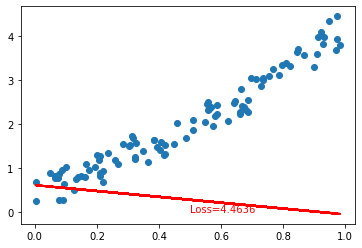

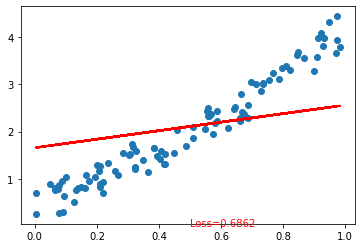

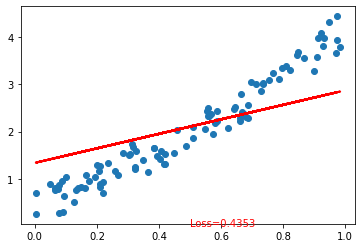

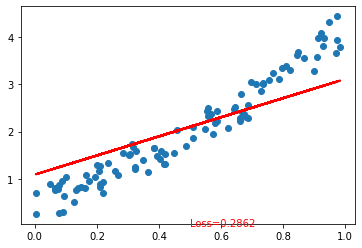

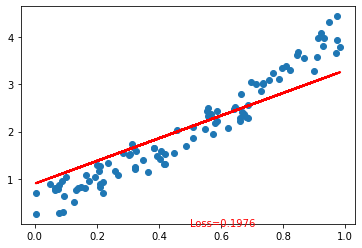

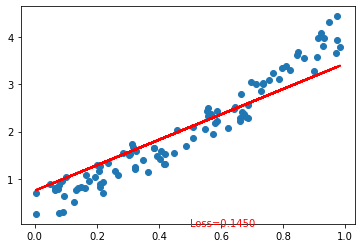

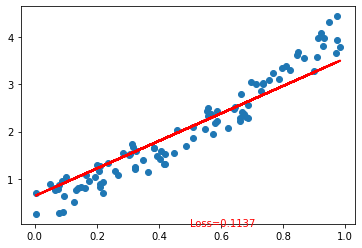

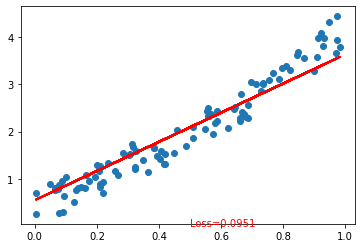

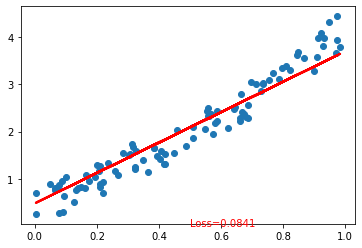

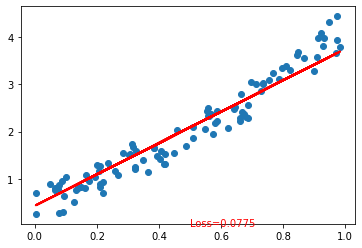

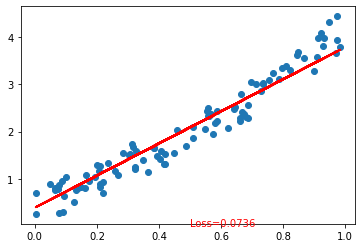

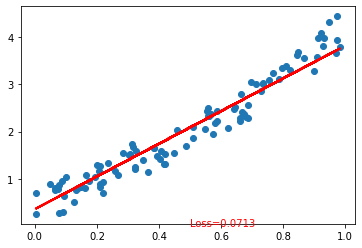

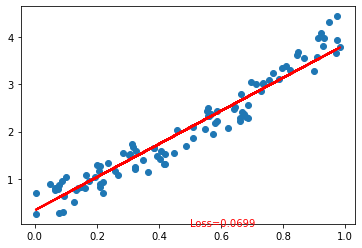

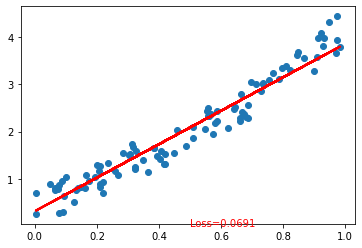

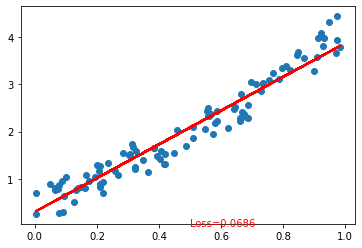

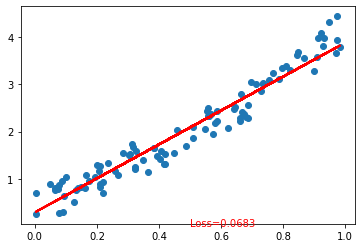

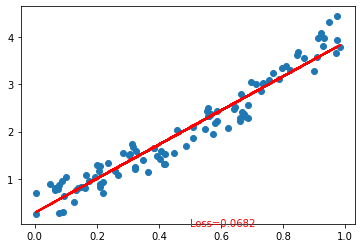

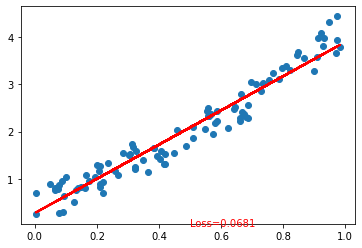

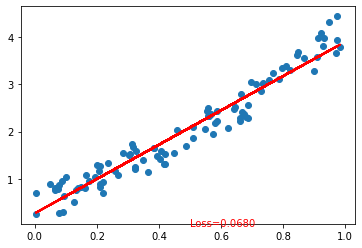

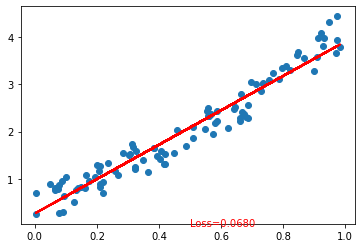

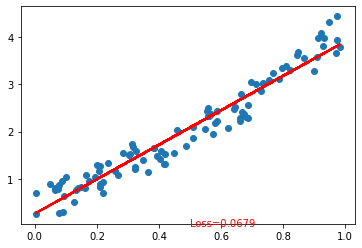

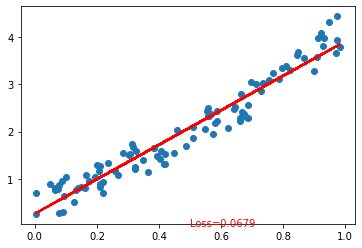

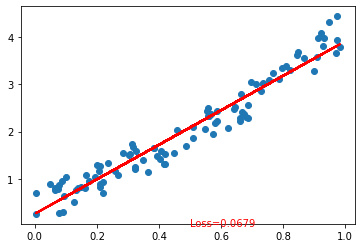

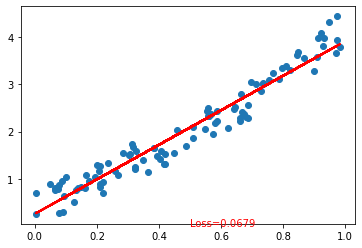

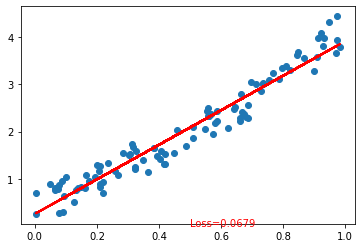

In [6]:
for i in range(250):
    
    optimizer.zero_grad()

    prediction = net(x)
    loss = loss_func(prediction, y) 
    
    loss.backward()        
    optimizer.step()       

    if i % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

plt.show()

That's it! This was a really simple example, now you can try with an harder one. Pull the Github repo and work in team.